In [1]:
# ClearML - Example of integrating plots and training on jupyter notebook. 
# In this example, simple graphs are shown, then an MNIST classifier is trained using Keras.

from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Connecting ClearML
from clearml import Task
task = Task.init(project_name = 'examples', task_name = 'notebook example')

ClearML Task: overwriting (reusing) task id=6de40029e54c41d7a1a24a1f2dc9cad2
ClearML results page: https://demoapp.clearml.allegro.ai/projects/087f765c846c4c76a7e9f3d035667d82/experiments/6de40029e54c41d7a1a24a1f2dc9cad2/output/log


In [3]:
# Set script parameters
task_params = {'num_scatter_samples': 60, 'sin_max_value': 20, 'sin_steps': 30}
task_params = task.connect(task_params)

Simple plots. You can view the plots in experiments results page  

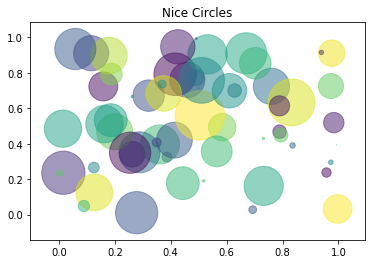

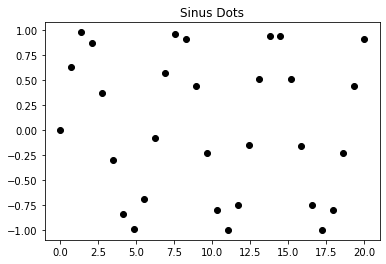

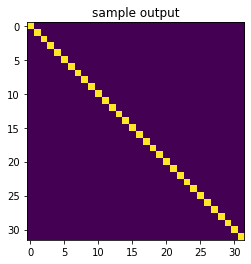

In [4]:
%matplotlib inline
N = task_params['num_scatter_samples']
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (50 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Nice Circles')
plt.show()

x = np.linspace(0, task_params['sin_max_value'], task_params['sin_steps'])
y = np.sin(x)
plt.plot(x, y, 'o', color='black')
plt.title('Sinus Dots')
plt.show()

m = np.eye(32, 32, dtype=np.uint8)
plt.imshow(m)
plt.title('sample output')
plt.show()

Keras training example


In [5]:
# Notice, Updating task_params is traced and updated in ClearML
task_params['batch_size'] = 128
task_params['nb_classes'] = 10
task_params['nb_epoch'] = 6
task_params['hidden_dim'] = 512
batch_size = task_params['batch_size']
nb_classes = task_params['nb_classes']
nb_epoch = task_params['nb_epoch']

In [6]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

hidden_dim = task_params['hidden_dim']
model = Sequential()
model.add(Dense(hidden_dim, input_shape=(784,)))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(hidden_dim))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

board = TensorBoard(histogram_freq=1, log_dir='/tmp/histogram_example')
model_store = ModelCheckpoint(filepath='/tmp/weight.{epoch}.hdf5')

model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    callbacks=[board, model_store],
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

W1028 20:45:45.150056 139687276058368 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1028 20:45:45.166742 139687276058368 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1028 20:45:45.170039 139687276058368 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1028 20:45:45.228762 139687276058368 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1028 20:45:45.236253 139687276058368 deprecation_wrappe

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________________________

W1028 20:45:46.286724 139687276058368 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1028 20:45:46.357379 139687276058368 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1028 20:45:46.554848 139687276058368 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/callbacks.py:796: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.

W1028 20:45:46.574680 139687276058368 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/callbacks.py:850: The name tf.summary.merge_all is

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 4s 74us/step - loss: 0.2136 - acc: 0.9347 - val_loss: 0.1043 - val_acc: 0.9666
Epoch 2/6
60000/60000 [==============================] - 5s 76us/step - loss: 0.0811 - acc: 0.9751 - val_loss: 0.0691 - val_acc: 0.9772
Epoch 3/6
60000/60000 [==============================] - 5s 85us/step - loss: 0.0538 - acc: 0.9833 - val_loss: 0.0702 - val_acc: 0.9789
Epoch 4/6
60000/60000 [==============================] - 5s 82us/step - loss: 0.0385 - acc: 0.9880 - val_loss: 0.0711 - val_acc: 0.9807
Epoch 5/6
60000/60000 [==============================] - 5s 76us/step - loss: 0.0300 - acc: 0.9905 - val_loss: 0.0846 - val_acc: 0.9788
Epoch 6/6
60000/60000 [==============================] - 5s 75us/step - loss: 0.0227 - acc: 0.9931 - val_loss: 0.0782 - val_acc: 0.9814
Test score: 0.07817659145611801
Test accuracy: 0.9814
